# Chapter 3: Classification

Will be analyzing the MNIST dataset, 70,000 small images of high schooler handwritten digits. Data is labeled with which character it represents.

Fetch data using sklearn

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

from sklearn.datasets import fetch_mldata

mnist = fetch_mldata('MNIST original')
mnist

{'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([0., 0., 0., ..., 9., 9., 9.])}

In [2]:
x,y = mnist["data"], mnist["target"]

In [3]:
x.shape

(70000, 784)

Each image is 28x28 pixels = 784 pixels (features)
Featues have values from 0 (white) to 255 (black)

In [4]:
y.shape

(70000,)

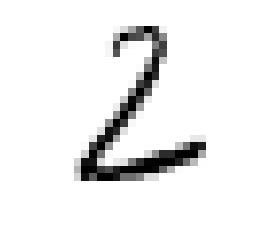

In [5]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

some_digit = x[15678]

some_digit_image = some_digit.reshape(28,28)

plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation = "nearest")
plt.axis("off")
plt.show()

Split into training and test sets. MNIST is typically split into 60k/10k train/test

Split and shuffle

In [6]:
x_train, x_test, y_train, y_test = x[:60000], x[60000:], y[:60000], y[60000:]

shuffle_index = np.random.permutation(60000)
x_train, y_train = x_train[shuffle_index], y_train[shuffle_index]

### Binary Classifier

Train a 5-detector (distinguishes 5 and not-5)

In [7]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)


Train a Stochastic Gradient Descent Classifier

In [8]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state = 42)
sgd_clf.fit(x_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False)

### Classifier Performance Measures

More difficult than classifying regression models

In [9]:
from sklearn.model_selection import cross_val_score


cross_val_score(sgd_clf, x_train, y_train_5, cv = 3, scoring = "accuracy")

array([0.9472 , 0.96015, 0.9645 ])

Approximately 10% of observations are 5s, so fully random classficiation should be right ~90% of the time.

To show this:
Make a fake classifier that classifies every observation as not-5

In [10]:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, x, y = None):
        pass
    def predict(self, x):
        return np.zeros((len(x), 1), dtype = bool)
    
cross_val_score(Never5Classifier(), x_train, y_train_5, cv = 3, scoring = "accuracy")

array([0.9082 , 0.9091 , 0.91165])

Preferable to use a confusion matrix over straight accuracy

In [11]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, x_train, y_train_5, cv = 3)

In [12]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5, y_train_pred)

array([[54193,   386],
       [ 2177,  3244]])

Can simplify as

* precision = TP / (TP + FP)
* recall = TP / (TP + FN)

In [13]:
from sklearn.metrics import precision_score, recall_score

print(precision_score(y_train_5, y_train_pred))
print(recall_score(y_train_5, y_train_pred))

0.89366391184573
0.5984135768308431


So the classifier is correct on 89% of 5-calls, but only identifies 60% of 5's.

Often useful to use another metric: F1, the harmonic mean of precision and recall

F1 = 2 / ( 1/precision + 1/recall )

In [14]:
from sklearn.metrics import f1_score

print(f1_score(y_train_5, y_train_pred))

0.7168268699591206


In [ ]:
y_scores = cross_val_predict(sgd_clf, x_train, y_train_5, cv = 3, method = "decision_function")

from sklearn.metrics import precision_recall_curve

